In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Resize하기
from PIL import Image
import glob                     
import os

# STEP 1 : 이미지 사이즈 변경하기

## 함수 정의 : resize와 save

In [3]:
def resize_images(img_path):
    # glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일 경로를 리스트 형식으로 반환
    images = glob.glob(img_path + "/*.jpg")     
    print(len(images), "images to be resized")
    
    # 파일마다 모두 28x28 사이즈로 변경 저장
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)                                                 # 이미지 object 반환
        new_img = old_img.resize(target_size, Image.ANTIALIAS)                    # PIL.Image.ANTIALIAS
                                                                                  # Anti-Alias : 낮은 해상도로 변환할 때 깨진 형태를 최소화해줌
        new_img.save(img, "JPEG")                                                 # 변경내용 저장
    
    print(len(images), "images resized")

## Resize 하기

In [4]:
names = ["rock", "scissor", "paper"]

# Train 데이터셋
for name in names:
    img_dir_path = os.getenv("HOME") + "/MyDeveloper/Aiffel/tensorflow/data/" + name         # 이미지 파일 경로
    resize_images(img_dir_path)                                                              # 함수 호출
    print(name, "resize completed")
    print()

# Test 데이터셋
for name in names:
    img_dir_path = os.getenv("HOME") + "/MyDeveloper/Aiffel/tensorflow/data/test/" + name         # 이미지 파일 경로
    resize_images(img_dir_path)                                                              # 함수 호출
    print(name, "resize completed")
    print()

2482 images to be resized


/var/folders/ph/bzq5p9_s57d_ly96857wzn940000gn/T/ipykernel_60907/1487777163.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)                    # PIL.Image.ANTIALIAS


2482 images resized
rock resize completed

2574 images to be resized
2574 images resized
scissor resize completed

2796 images to be resized
2796 images resized
paper resize completed

212 images to be resized
212 images resized
rock resize completed

214 images to be resized
214 images resized
scissor resize completed

246 images to be resized
246 images resized
paper resize completed



# STEP 2 : 이미지 Load하기

## 2.1 함수 정의 : load_data()

In [5]:
def load_data(img_dir_path, number_of_data=300): # 주의 : 가위바위보 이미지 총 개수이어야 함
    img_size = 28
    channel_n = 3
    names = ["rock", "scissor", "paper"]
    
    # 이미지 데이터를 담을 행렬(Matrix) 생성
    imgs = np.zeros(number_of_data * img_size * img_size * channel_n, dtype=np.int32)                # ndarray 1차원 벡터로 생성
    imgs = imgs.reshape(number_of_data, img_size, img_size, channel_n)                               # 이미지 shape으로 행렬 형태로 변경
    
    
    # 라벨(가위 :0, 바위 : 1, 보 :2) 데이터를 담을 행렬(Matrix) 생성
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    
    # 이미지 불러와서 ndarray(예시 : 28 x 28 x 3)형태로 변환하고 imgs 행렬에 할당하기
    # 지도학습 시킬 Target 라벨이 필요함
    # 가위 : 0, 바위 : 1, 보 : 2
    idx = 0
    for name in names:
        for file_path in glob.iglob(img_dir_path + name + '/*.jpg'):
            img = np.array(Image.open(file_path), dtype=np.int32)                                    # Image를 불러오고 그 이미지를 (28 x 28 x 3)처럼 array로 변환
            imgs[idx, :, :, :] = img                                                                 # 데이터 영역에 이미지 행렬 복사

            # 라벨 부여하기
            # 가위 : 0, 바위 : 1, 보 : 2
            if name == 'scissor':
                labels[idx] = 0                                                                         
            elif name == 'rock':
                labels[idx] = 1
            else:
                labels[idx] = 2
            
            idx += 1
    
    return imgs, labels

In [6]:
# 위 함수 이해를 위한 참고로 찍어봄
np.array(Image.open("/Users/hyunhonoh/MyDeveloper/Aiffel/tensorflow/data/paper/paper_1577.jpg"), dtype=np.int32).shape

(28, 28, 3)

## 2.2 Train, Test 데이터셋 파일 개수 세기

In [7]:
names = ["rock", "scissor", "paper"]

# Train 데이터셋
count_train = 0
for name in names:
    img_path = os.getenv("HOME") + "/MyDeveloper/Aiffel/tensorflow/data/" + name               # 이미지 파일 경로
    images = glob.glob(img_path + "/*.jpg")
    count_train += len(images)
    
print(count_train)

# Test 데이터셋
count_test = 0
for name in names:
    img_path = os.getenv("HOME") + "/MyDeveloper/Aiffel/tensorflow/data/test/" + name         # 이미지 파일 경로
    images = glob.glob(img_path + "/*.jpg")
    count_test += len(images)
    
print(count_test)

7852
672


## 2.3 이미지 불러오기 - 함수 호출

In [8]:
# Train 데이터셋
img_dir_path = os.getenv("HOME") + "/MyDeveloper/Aiffel/tensorflow/data/"
(x_train, y_train) = load_data(img_dir_path, number_of_data=count_train)                      # 내가 정의한 함수 호출
print("Train 데이터셋 불러오기 완료")

# Test 데이터셋
img_dir_path = os.getenv("HOME") + "/MyDeveloper/Aiffel/tensorflow/data/test/"
(x_test, y_test) = load_data(img_dir_path, number_of_data=count_test)                         # 내가 정의한 함수 호출
print("Test 데이터셋 불러오기 완료")

Train 데이터셋 불러오기 완료
Test 데이터셋 불러오기 완료


In [9]:
from sklearn.model_selection import train_test_split

# 훈련용과 검증용으로 분류
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=2022, shuffle=True)

In [10]:
# 확인용
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print()
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6281, 28, 28, 3)
y_train shape: (6281,)

x_test shape: (672, 28, 28, 3)
y_test shape: (672,)


### 2.4 x와 y 데이터 확인해보기

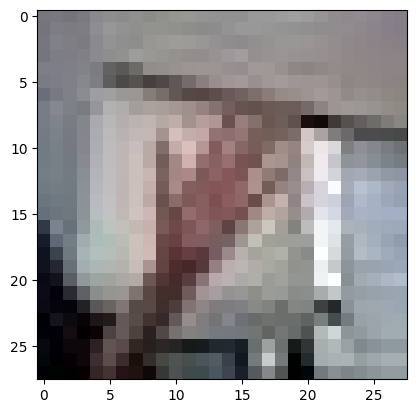

In [11]:
plt.imshow(x_train[6000], cmap=plt.cm.binary)
plt.show()

In [12]:
print("라벨:", y_train[6000])

라벨: 2


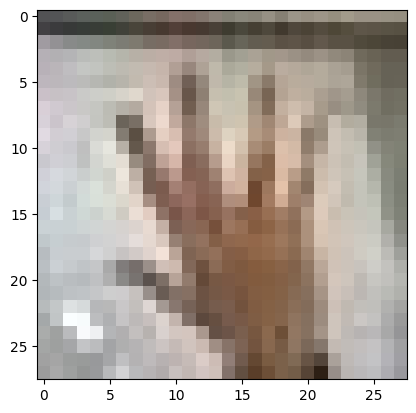

In [13]:
plt.imshow(x_test[600], cmap=plt.cm.binary)
plt.show()

In [14]:
print("라벨:", y_test[600])

라벨: 2


## 2.5 정규화

In [15]:
x_train_norm = (x_train - np.min(x_train)) / 255.0         # 입력은 0~1 사이의 값으로 정규화
x_test_norm = (x_test - np.min(x_test)) / 255.0            # 입력은 0~1 사이의 값으로 정규화

# STEP 3 : DNN 설계

In [16]:
model=keras.models.Sequential()                                                      # Sequential 모델 객체 생성

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))  # color 이미지이므로, 입력을 3채널
                                                                                     # CNN
                                                                                     # 16은 filter 개수
                                                                                     # (3, 3)은 filter/kernel 사이즈
                                                                                     # input_shape: 입력이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))                                               # Maxpooling
                                                                                     # (2, 2)은 pool사이즈  
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))                         # CNN, 32은 filter 개수
                                                                                     # 32은 filter 개수
                                                                                     # (3, 3)은 filter/kernel 사이즈
model.add(keras.layers.MaxPooling2D((2,2)))                                          # Maxpooling
                                                                                     # (2, 2)은 pool사이즈  
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))                         # CNN, 64은 filter 개수
                                                                                     # 32은 filter 개수
                                                                                     # (3, 3)은 filter/kernel 사이즈
model.add(keras.layers.MaxPooling2D((2,2)))                                          # Maxpooling
                                                                                     # (2, 2)은 pool사이즈 
model.add(keras.layers.Flatten())                                                    # Flatten
model.add(keras.layers.Dense(32, activation='relu'))                                 # regular densely-connected NN layer
                                                                                     # 32는 units: 해당 은닉층에서 활동하는 뉴런의 수
model.add(keras.layers.Dense(3, activation='softmax'))                               # Target이 가위바위보 3개이므로 units는 3
                                                                                     # 활성화함수 : softmax
                                                                                     # units: 해당 은닉층에서 활동하는 뉴런의 수
                                                                                     # 최종 출력이 3개이므로 units를 3으로 설정함
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Metal device set to: Apple M1
Model에 추가된 Layer 개수:  9
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 m

2022-10-01 22:27:49.316963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-01 22:27:49.317557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# STEP 4 : 모델 학습

In [17]:
# 모델 configure하기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

2022-10-01 22:27:49.523530: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-10-01 22:27:49.717678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - ETA: 0s - loss: 1.1335 - accuracy: 0.6333

2022-10-01 22:27:52.495633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 3s 15ms/step - loss: 1.1335 - accuracy: 0.6333 - val_loss: 0.6575 - val_accuracy: 0.7206
Epoch 2/10
197/197 [==============================] - 3s 13ms/step - loss: 0.4751 - accuracy: 0.8152 - val_loss: 0.3797 - val_accuracy: 0.8517
Epoch 3/10
197/197 [==============================] - 2s 10ms/step - loss: 0.2946 - accuracy: 0.8895 - val_loss: 0.3355 - val_accuracy: 0.8727
Epoch 4/10
197/197 [==============================] - 2s 10ms/step - loss: 0.1963 - accuracy: 0.9280 - val_loss: 0.2785 - val_accuracy: 0.8924
Epoch 5/10
197/197 [==============================] - 2s 9ms/step - loss: 0.1432 - accuracy: 0.9489 - val_loss: 0.1920 - val_accuracy: 0.9313
Epoch 6/10
197/197 [==============================] - 2s 8ms/step - loss: 0.1031 - accuracy: 0.9624 - val_loss: 0.1674 - val_accuracy: 0.9427
Epoch 7/10
197/197 [==============================] - 2s 8ms/step - loss: 0.0916 - accuracy: 0.9662 - val_loss: 0.1577 - val_accuracy: 0.9453
Epoch 8/10
19

# STEP 5 : 성능 평가

In [31]:
# 모델 예측 및 성능 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("test_loss:", test_loss)
print("test_accuracy:", test_accuracy)    

21/21 - 0s - loss: 2.2671 - accuracy: 0.6443 - 223ms/epoch - 11ms/step
test_loss: 2.267122983932495
test_accuracy: 0.644345223903656


# STEP 6 : 잘못 예측한 이미지 데이터 확인해보기

- model.evaluate() 대신 model.predict()를 사용하면 model이 입력 테스트 이미지에 대한 실제로 추론한 확률분포를 출력
- model은 가위:0, 바위:1, 보:2 중 어느 것일지에 대한 확률값을 출력하는 함수
- 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 됨

In [33]:
predicted_result = model.predict(x_test)                 # model이 추론한 확률값
                                                         # 한 벡터의 원소는 10개이고 각각이 해당숫자에 대한 모델이 예측한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)   # 한 이미지 데이터에서 가장 높은 확률에 해당하는 인덱스를 뽑아냄
                                                         # 여기서 인덱스는 곧 target인 digit을 의미

print()

# 임의 인덱스 넣어보기
idx=120
print("model.predict() 결과:", predicted_result[idx])
print("model 예측한 확률이 높은 결과:", predicted_labels[idx])
print("실제 데이터의 라벨:", y_test[idx])

21/21 [==============================] - 0s 3ms/step

model.predict() 결과: [4.1750056e-04 3.3503196e-01 6.6455054e-01]
model 예측한 확률이 높은 결과: 2
실제 데이터의 라벨: 1


## 6.1 테스트 데이터 이미지가 맞았는지 확인 

예측확률분포:  [6.2707089e-02 2.4468756e-07 9.3729264e-01]
예측결과:  2
정답 라벨:  0


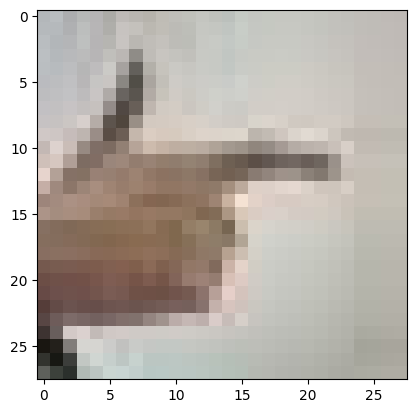


예측확률분포:  [5.3143449e-02 1.5445464e-08 9.4685650e-01]
예측결과:  2
정답 라벨:  0


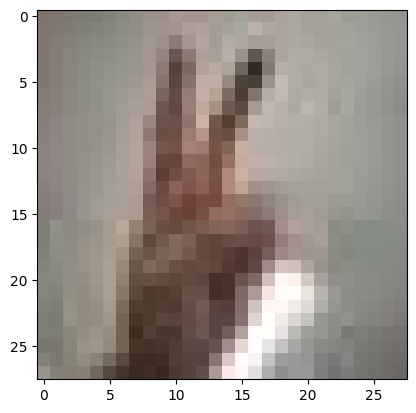


예측확률분포:  [1.8291416e-09 5.3508505e-13 1.0000000e+00]
예측결과:  2
정답 라벨:  0


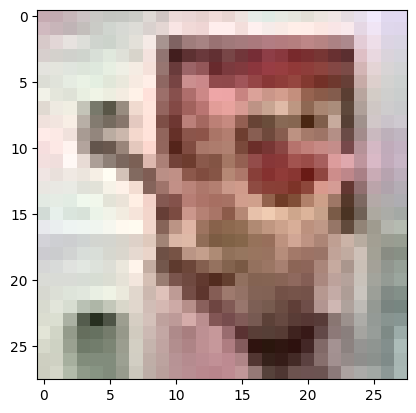


예측확률분포:  [3.1561380e-05 2.6006603e-07 9.9996817e-01]
예측결과:  2
정답 라벨:  0


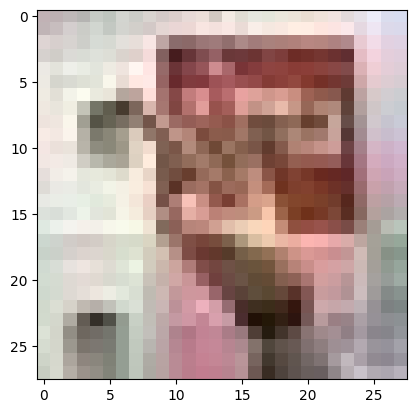


예측확률분포:  [0.00726892 0.17177665 0.8209544 ]
예측결과:  2
정답 라벨:  0


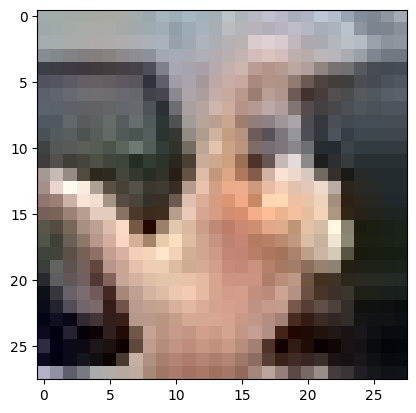

In [20]:
import random

n = len(predicted_labels)
wrong_predict_list=[]

# 예측값과 정답지와 다른 경우만 추출
for i in range(n):
    # i번째 test_labels과 y_test가 다른 경우만 모아 봄
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 랜덤하게 5개만 뽑아봄
samples = random.choices(population=wrong_predict_list, k=5)       
for j in samples:
    print("예측확률분포: ", predicted_result[j])
    print("예측결과: ", predicted_labels[j])
    print("정답 라벨: ", y_test[j])
    
    plt.imshow(x_test[j], cmap=plt.cm.binary)
    plt.show()
    print()

> 배경이 빨간색이거나 형광등이 있는 경우는 이미지 식별을 제대로 못하고 있다 

# STEP 7 : 시각화

In [21]:
# 확인용
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
# 확인용
history.history

{'loss': [1.133480191230774,
  0.4751002788543701,
  0.29461678862571716,
  0.19630037248134613,
  0.1431673914194107,
  0.10312024503946304,
  0.0915924459695816,
  0.07153670489788055,
  0.07476967573165894,
  0.11017138510942459],
 'accuracy': [0.6333386301994324,
  0.8151568174362183,
  0.889508068561554,
  0.9280369877815247,
  0.9488935470581055,
  0.9624264240264893,
  0.9662474393844604,
  0.9726158380508423,
  0.9734119176864624,
  0.9630632400512695],
 'val_loss': [0.6574944257736206,
  0.37968236207962036,
  0.3354916572570801,
  0.27852508425712585,
  0.19197340309619904,
  0.16741371154785156,
  0.15765176713466644,
  0.12331556528806686,
  0.22925439476966858,
  0.1261623352766037],
 'val_accuracy': [0.7205601930618286,
  0.8516868352890015,
  0.8726925849914551,
  0.8924252390861511,
  0.9312540292739868,
  0.9427117109298706,
  0.945257842540741,
  0.9535328149795532,
  0.9306175112724304,
  0.9522597789764404]}

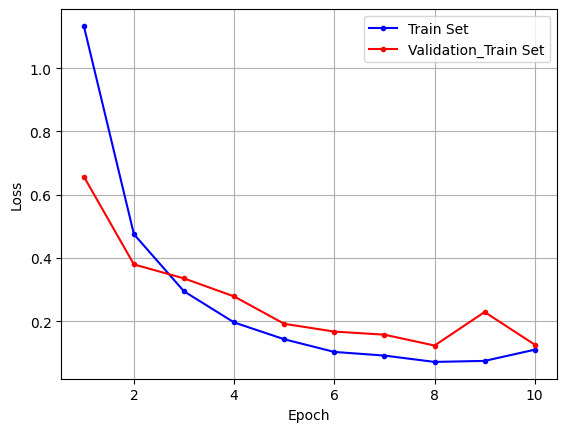

In [28]:
# Train 데이터셋의 학습 결과
loss_train = history.history['loss']
epoch_train = np.arange(len(loss_train)) + 1

loss_test = history.history['val_loss']
epoch_test = np.arange(len(loss_test)) + 1

plt.plot(epoch_train, loss_train, c='b', marker='.', label="Train Set")
plt.plot(epoch_test, loss_test, c='r', marker='.', label="Validation_Train Set")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

> train set의 8 또는 9 epoch에서 손실함수가 증가하는 경향을 보이고 있다. 따라서 epoch 8이 가장 좋은 횟수임을 추정할 수 있다

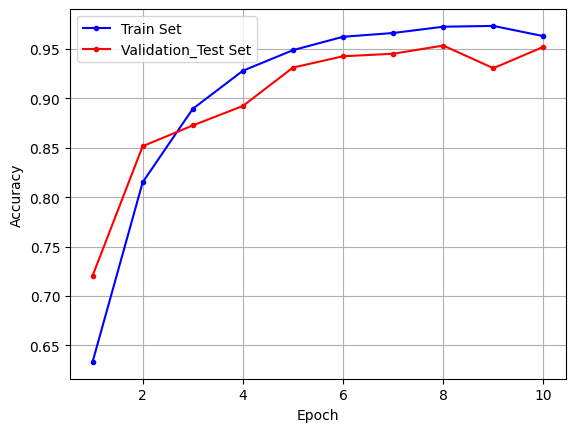

In [34]:
# Test 데이터셋의 학습 결과
train_accuracy = history.history['accuracy']
epoch_train = np.arange(len(train_accuracy)) + 1

test_accuracy = history.history['val_accuracy']
epoch_test = np.arange(len(test_accuracy)) + 1

plt.plot(epoch_train, train_accuracy, c='b', marker='.', label="Train Set")
plt.plot(epoch_test, test_accuracy, c='r', marker='.', label="Validation_Test Set")

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


> Train 데이터 셋의 epoch 8 또는 9에서 정확도가 감소하는 경향을 보이고 있다. 따라서 epoch 8까지 학습이 최적의 해임을 추정할 수 있다

# STEP 8 : 회고

1. 이번 프로젝트에서 어려웠던 점  
    - 이미지 관련 함수와 라이브러리 사용법을 이해하는데 어려웠습니다. 특히 왜 배열이 1차원인지 2차원인지 3차원인지 구분하는 것이 어려웠으며 언제 reshape을 해야하는지 이해하기 어려웠습니다. 노드 따라하면 할 수 있었지만 혼자서 해보려고하니 배열 shape을 언제 어떻게 바꿔야할지 힘들었습니다. 
    - 테스트 데이터셋을 일부러 배경을 다양하게 하여 어렵게 만들었습니다. 그 결과 예측 정확도가 학습 정확도에 비해 30퍼센트나 떨어지는 것을 알게 되었고 예측 정확도를 높이기 위해서는 이미지의 배경화면을 mask를 통해 살색을 따오고 넣어주면 예측 정확도를 높일 수 있다고 생각했습니다
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점  
    - 개념은 이해하고 있으나 코드로 구현하는데 있어서 머리가 멍한것이 문제인거 같습니다
3. 루브릭 평가 지표를 맞추기 위해 시도한 것들
    - 훈련 데이터셋을 sklearn으로 validation 데이터셋으로 구분하고 모델에 학습하였습니다. 실제 테스트하기 전에 미리 예측정확도 추정하는 것인데 그 결과를 그래프로 나타내니 좀 더 이해하는데 도움이 되었습니다
    - 예측 정확도를 높이기 위해서 다양한 시도를 해봤습니다. 그 중에 epoch를 증가시켰더니 epoch 8에서 손실함수는 증가하려고 했고 검증 데이터 평가의 정확도가 감소하는 경향이 보였습니다. 결국 epoch를 증가하는 것은 과적합의 가능성을 보여줬습니다. 
    - 이미지의 정규화를 통해서 데이터의 오버피팅 가능성을 낮췄습니다
    - convolution layer 필터 64개 짜리 추가하고 maxpooling 레이어 한 개 더 추가하여 정확도 47퍼센트에서 약 65퍼센트까지 올렸습니다. 특징을 추출하는 convolution 레이어는 필터가 많으면 좋은 결과를 얻었습니다
4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정  
    - 달성함
5. 자기 다짐   
    - 전체 개념은 이해하기 쉬웠으나 코드 해석하는데 시간을 많이 소비했습니다. 다른 사람보다 코드 읽는 시간이 점점 늘어나는 것을 보니 코드 해석하는데 시간을 줄일수 있도록 방법을 찾아봐야겠습니다.
